In [14]:
!pip install requests
!pip install lxml
!pip install pandas
!pip install matplotlib

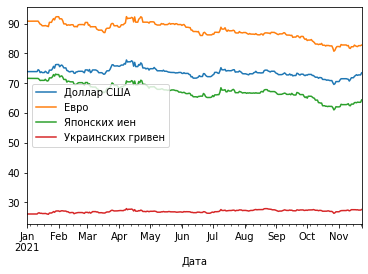

In [29]:
import requests
import pandas as pd
import datetime as dt

required_names = ['Доллар США', 'Евро', 'Японских иен', 'Украинских гривен']
today_date = dt.datetime.now().date()
start_year_date = dt.date(today_date.year,1,1)

raw_df = pd.DataFrame()
for days_count in range((today_date - start_year_date).days + 1):
    target_day = (start_year_date + dt.timedelta(days=days_count)).strftime('%d/%m/%Y')
    url = f'https://www.cbr.ru/scripts/XML_daily.asp?date_req={target_day}'
    xml = requests.get(url).text
    data_table = pd.read_xml(xml)
    data_table['date'] = target_day
    
    raw_df = raw_df.append(data_table)
raw_df = raw_df[raw_df['Name'].isin(required_names)][['date', 'Name', 'Value']]

output_data = []
for date in raw_df['date'].unique():
    row_data = {'Дата': date}
    for currency in required_names:
        currency_price = raw_df[(raw_df['date'] == date) 
                                & (raw_df['Name'] == currency)]['Value'].values[0]
        row_data[currency] = float(currency_price.replace(',', '.'))
    output_data.append(row_data)
result_df = pd.DataFrame(output_data)
result_df.to_csv('output_2.csv', sep=';', encoding='cp1251')

result_df['Дата'] = pd.to_datetime(result_df['Дата'], format='%d/%m/%Y')
result_df.set_index('Дата').plot();